# Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


#Load Dataset

In [2]:
data = pd.read_csv("C:/Users/Manth/OneDrive/Desktop/cricket-eda/data/matches.csv")
data.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#Dataset Overview

In [3]:
print("Shape of dataset:", data.shape)
print(data.info())
print(data.isnull().sum())


Shape of dataset: (756, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3

#Data Cleaning

In [4]:
if 'umpire3' in data.columns:
    data.drop('umpire3', axis=1, inplace=True)

if data['city'].isnull().sum() > 0:
    data['city'].fillna(data['city'].mode()[0], inplace=True)


C:\Users\Manth\AppData\Local\Temp\ipykernel_24096\2396165455.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['city'].fillna(data['city'].mode()[0], inplace=True)


#Top 5 Winning Teams


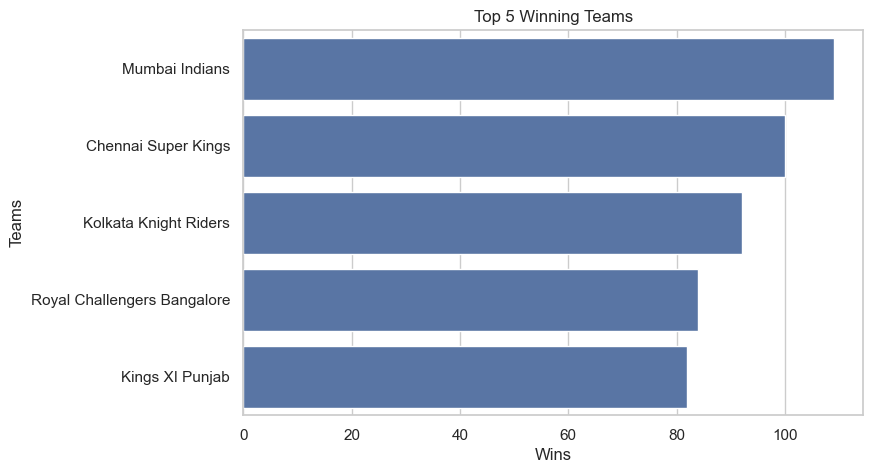

In [5]:
top_teams = data['winner'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title("Top 5 Winning Teams")
plt.xlabel("Wins")
plt.ylabel("Teams")
plt.show()


#Toss Decision Count


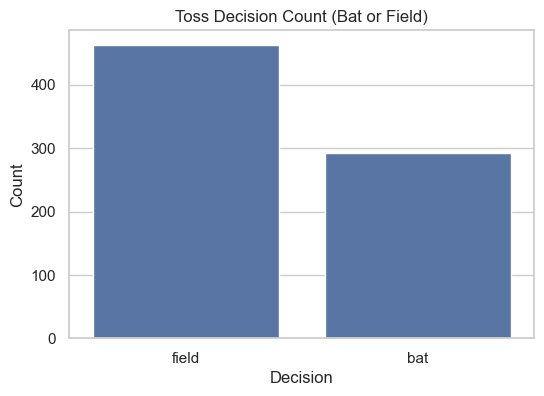

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=data)
plt.title("Toss Decision Count (Bat or Field)")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()


#Top 10 Venues

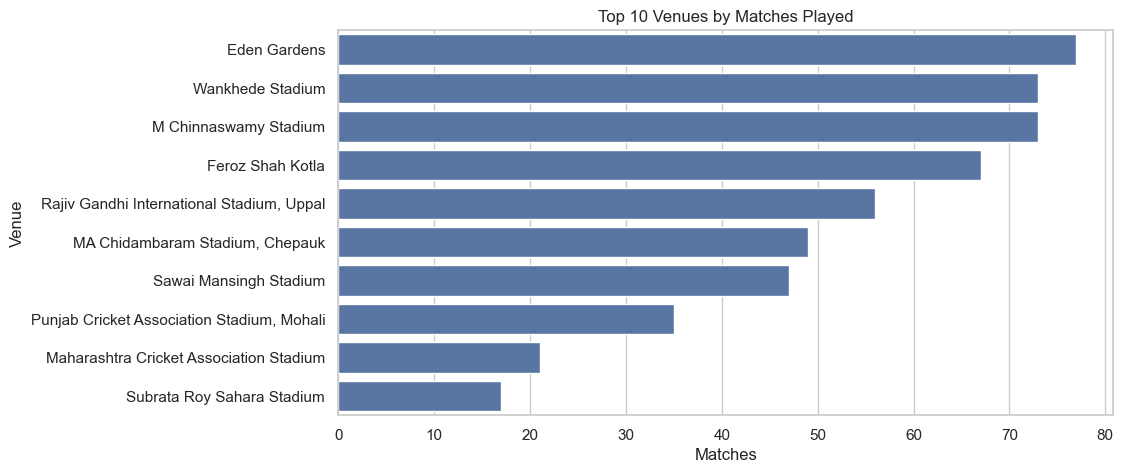

In [8]:
top_venues = data['venue'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_venues.values, y=top_venues.index)
plt.title("Top 10 Venues by Matches Played")
plt.xlabel("Matches")
plt.ylabel("Venue")
plt.show()


#Distribution of Wins by Runs

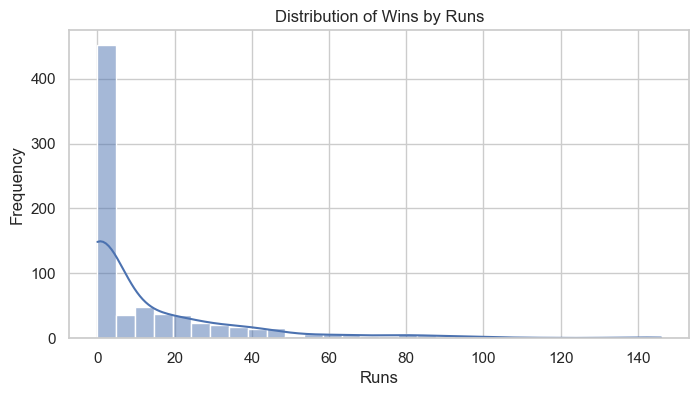

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(data['win_by_runs'], bins=30, kde=True)
plt.title("Distribution of Wins by Runs")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


#Correlation Heatmap

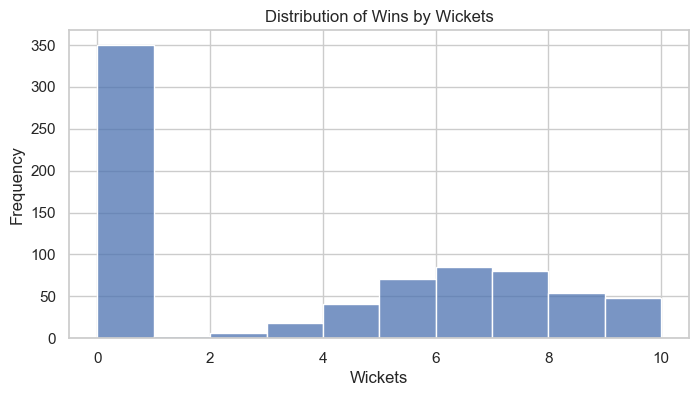

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(data['win_by_wickets'], bins=10, kde=False)
plt.title("Distribution of Wins by Wickets")
plt.xlabel("Wickets")
plt.ylabel("Frequency")
plt.show()


#Key Insights

In [11]:
print("Key Insights:")
print("- Most successful team:", data['winner'].mode()[0])
print("- Most common toss decision:", data['toss_decision'].mode()[0])
print("- Venue with most matches:", data['venue'].mode()[0])


Key Insights:
- Most successful team: Mumbai Indians
- Most common toss decision: field
- Venue with most matches: Eden Gardens
